### <span style="color:red">**SPRINT 11:**</span> <span style="color:YELLOW">**Visualización de datos con PYTHON y Power BI**</span>

#### **NIVEL 1**

**1.1** Conecta Python con MySQL Workbench y carga los datos de tu base de datos del sprint 4 para usarlas en todos los ejercicios.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
import seaborn as sns

In [29]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root1234",
    database="transactions_s4"
)

df_transactions = pd.read_sql("SELECT * FROM `transaction`", conn)
df_users = pd.read_sql("SELECT * FROM users", conn)
df_cards = pd.read_sql("SELECT * FROM credit_cards", conn)
df_companies = pd.read_sql("SELECT * FROM companies", conn)
df_transaction_product = pd.read_sql("SELECT * FROM transaction_product", conn)
df_products = pd.read_sql("SELECT * FROM products", conn)
df_targetes_actives = pd.read_sql("SELECT * FROM targetes_actives", conn)

conn.close()

C:\Users\vanes\AppData\Local\Temp\ipykernel_11768\3767512378.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql("SELECT * FROM `transaction`", conn)
C:\Users\vanes\AppData\Local\Temp\ipykernel_11768\3767512378.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_users = pd.read_sql("SELECT * FROM users", conn)
C:\Users\vanes\AppData\Local\Temp\ipykernel_11768\3767512378.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cards = pd.read_sql("SELECT * FROM credit_cards", conn)
C:\Users\va

1.2. Para cada ítem, crea una visualización adecuada según las variables especificadas. Interpreta los resultados según tus datos.
Una variable numérica.  
Dos variables numéricas.  
Una variable categórica.  
Una variable categórica y una numérica.  
Dos variables categóricas.  
Tres variables combinadas.  
Crea un Pairplot.

#### 1 var. CATEGÓRICA

###### Ej 1: BAR PLOT HORIZONTAL

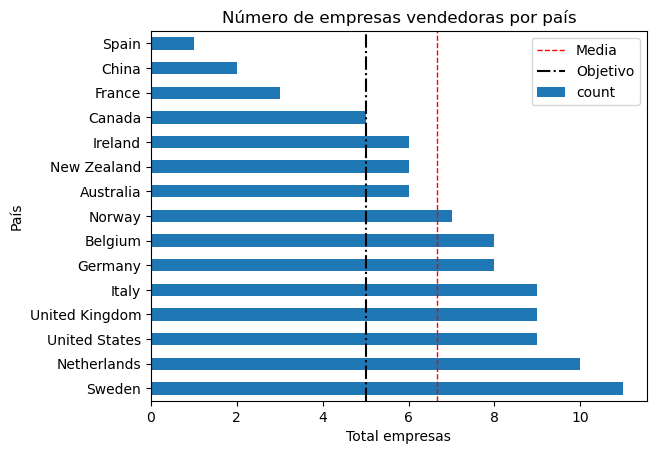

In [30]:
ax = df_companies["country"].value_counts().plot.barh()          
plt.title("Número de empresas vendedoras por país")
plt.ylabel("País")
plt.xlabel("Total empresas")
media = df_companies["country"].value_counts().mean()
ax.axvline(x=media, color='r', linestyle='--', linewidth=1,label="Media")
ax.axvline(x=5, color='black', linestyle="-.", label="Objetivo")
ax.legend()

plt.show()

Permite observar:  
-países que están por encima o debajo de la media  
-países que cumplen el objetivo de suma mínima de empresas vendedoras en ese mercado.  
-países donde hay potencial de expansión pero que hay que estudiar más a fondo con otros parámetros del mercado, competencia, etc.

###### Ej 2: BAR PLOT EN %

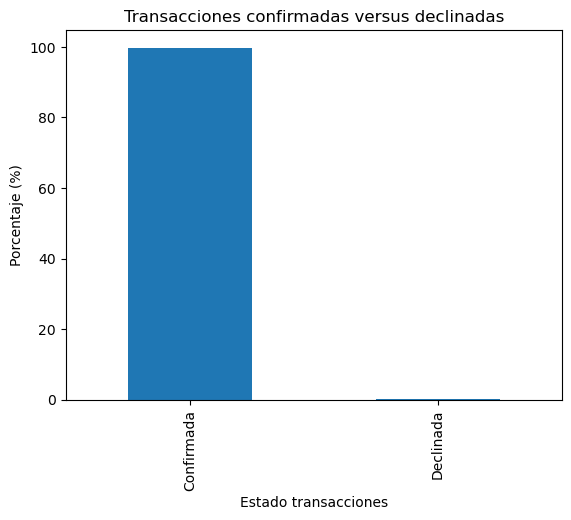

In [31]:
df_transactions["declined"].map({0: "Confirmada", 1: "Declinada"}).value_counts(normalize=True).mul(100).plot.bar()          
plt.title("Transacciones confirmadas versus declinadas")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Estado transacciones")
plt.show()

###### Ej 3: BAR PLOT

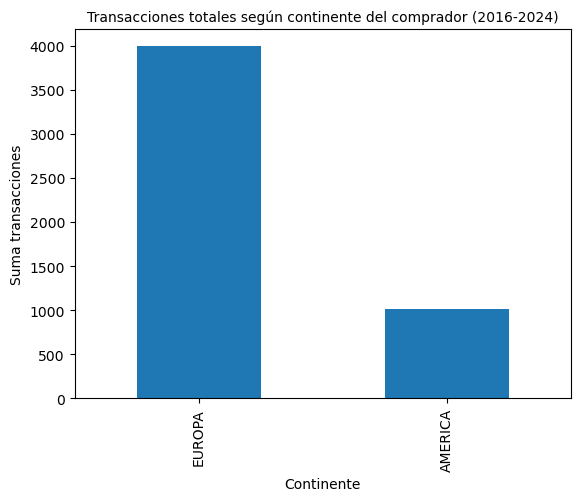

In [ ]:
df_users["continent"].value_counts().plot.bar()
plt.title("Transacciones totales según continente del comprador (2016-2024)", fontsize= 10)
plt.ylabel("Suma transacciones")
plt.xlabel("Continente")
plt.show()

# VERSIÓ PERCENTUAL:
#     df_users["continent"].value_counts(normalize=True).mul(100).plot.bar()

VERSIÓ PERCENTUAL BAR PLOT ANTERIOR: df_users["continent"].value_counts(normalize=True).mul(100).plot.bar()

###### Ej 4: PIE PLOT

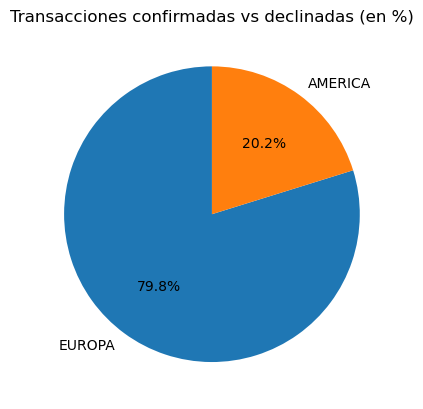

In [33]:
df_users["continent"].value_counts(normalize=True).mul(100).plot.pie(startangle=90, autopct='%1.1f%%')
plt.title("Transacciones confirmadas vs declinadas (en %)")
plt.ylabel("")  # "" x treure etiqueta lateral
plt.show()


#### 1 var. NUMÉRICA

###### Ej 5: Histograma

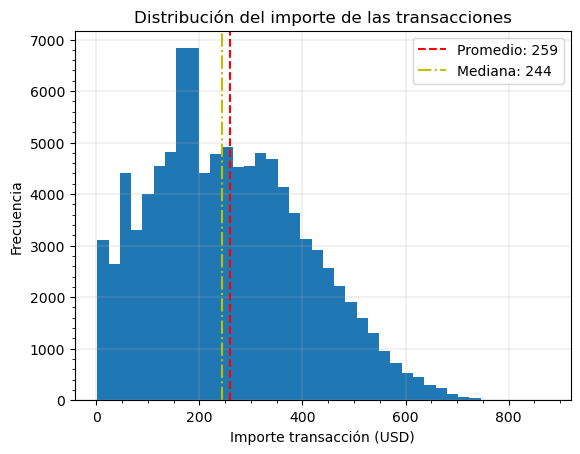

In [34]:
# MATPLOTLIB
plt.hist(df_transactions["amount"], bins=40)
media_ej5 = df_transactions["amount"].mean()
mediana_ej5 = df_transactions["amount"].median()

plt.axvline(media_ej5, color='r', linestyle="--", label=f"Promedio: {media_ej5:.0f}")
plt.axvline(mediana_ej5, color='y', linestyle="-.", label=f"Mediana: {mediana_ej5:.0f}")

plt.title("Distribución del importe de las transacciones")
plt.xlabel("Importe transacción (USD)")
plt.ylabel("Frecuencia")
plt.minorticks_on()
plt.grid(linewidth=0.25)
plt.legend(loc="best")
plt.show()


Se observa que:  
-   la distribución principal del importe de las transacciones se encuentra entre 100 y 350 USD, con un pico (moda) entre 150-200 USD.  
-   El número de transacciones disminuye de forma gradual en pedidos de importe superior a 350 USD.  
-   Hay una asimetría con cola a la derecha (pedidos de importes superiores, menos frecuentes)

Interesaría cruzar esta información con la cantidad de productos por transacción y el precio de los productos incluidos; también interesaría saber si las transacciones más elevadas son debidas a muchas unidades o a productos más caros.

#### 2 var. NUMÉRICA

###### Ej 6: Box plot

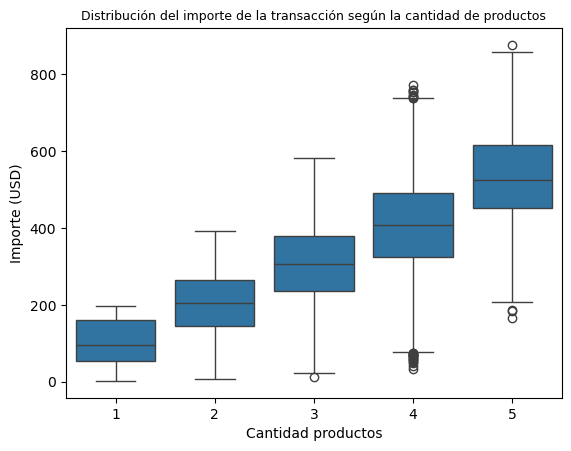

In [67]:
# DF suma productos por venta
df_unidades = (df_transaction_product.groupby("transaction_id")["unitats"].sum())

# Unión tablas transactions con transaction_product
df_grafica_unidades_amount = df_transactions.merge(df_unidades, left_on="id", right_on="transaction_id")

sns.boxplot(x="unitats", y="amount", data=df_grafica_unidades_amount)
plt.title("Distribución del importe de la transacción según la cantidad de productos", fontsize=9)
plt.ylabel("Importe (USD)")
plt.xlabel("Cantidad productos")
plt.show()


Se observa:  
- relación positiva: a más unidades incluidas en la transacción, mayor importe total del tiquet (transacción). Así el volumen de unidades explica en parte que aumente el tiquet.  
- La variación del importe total de la venta es más amplio cuando hay 3-5 unidades incluidas.  
- En transacciones con 4 unidades, se concentran bastantes outliers, lo que indica transacciones con coste total anormalmente alta o baja. Deberíamos revisar si los datos contienen algún error o alguna compra especial.

###### Ej 7: Scatter plot (a)

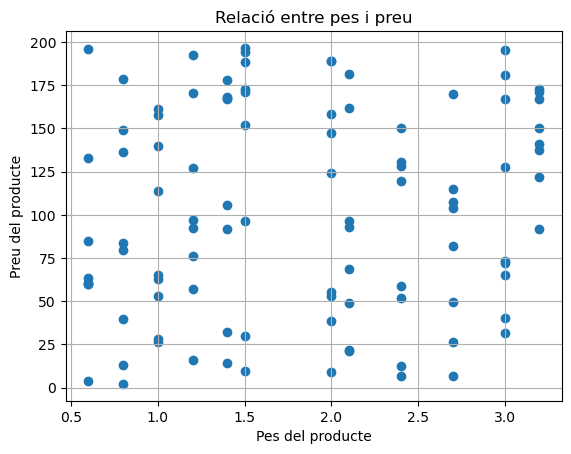

In [36]:
# df_transactions.plot.scatter(x="amount", y="declined");
plt.scatter(df_products["weight"], df_products["price"])
plt.xlabel("Pes del producte")
plt.ylabel("Preu del producte")
plt.title("Relació entre pes i preu")
plt.grid()
plt.show()


- Dada la dispersión generalizada, no hay correlación entre el peso y el precio del producto.
- En caso que la correlación hubiera sido positiva, podría haber indicado oor ej. que el precio del kg de materia prima es significativo y/o que a más material, más coste de procesado/producción (que se repercute en el precio final).

###### Ej 8: Scatter plot (b)

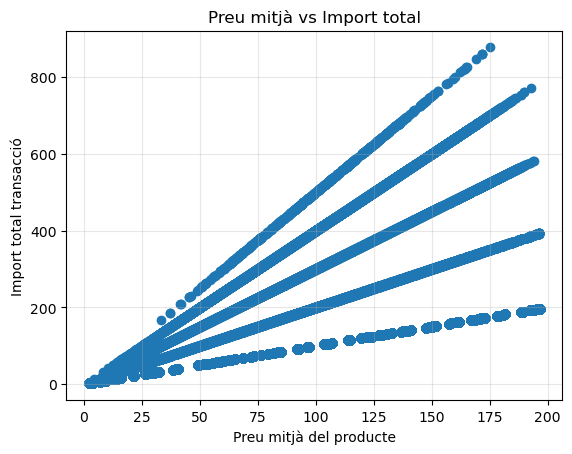

In [37]:
df_price_mean = (
    df_transaction_product
    .groupby("transaction_id")["price"]
    .mean()
    .reset_index()
)

df_plot = df_transactions.merge(
    df_price_mean,
    left_on="id",
    right_on="transaction_id"
)

plt.scatter(df_plot["price"], df_plot["amount"])
plt.xlabel("Preu mitjà del producte")
plt.ylabel("Import total transacció")
plt.title("Preu mitjà vs Import total")
plt.grid(alpha=0.3)
plt.show()


Se observa:
- Correlación fuerte entre el precio medio de los productos incluidos y el importe total de la transacción; la presencia de productos caros en el pedido aumentará significativamente el valor final del tiquet.

#### 1 var. NUM + 1CAT

###### Ej 9: BAR PLOT

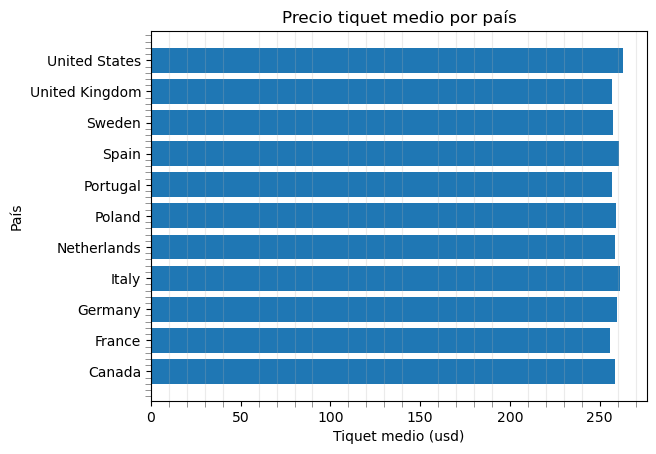

In [70]:
df_transactions_users = df_transactions.merge(df_users, left_on="user_id", right_on="id")
df_media_por_pais = df_transactions_users.groupby("country")["amount"].mean()
plt.barh(df_media_por_pais.index, df_media_por_pais.values)
plt.title("Precio tiquet medio por país")
plt.ylabel("País")
plt.xlabel("Tiquet medio (usd)")
plt.tick_params(which='minor', length=4, color='grey')  # Estil dels minor ticks
plt.grid(which='minor', axis='x', alpha=0.25)
plt.minorticks_on()

plt.show()


Se observa que:
- Homogeneidad relativa en el tiquet medio de los países (se concentra principalmente entre 250-260$, con algun país con tiquet medio 260-270$).
- No será necesario ningún estudio complementario de marketing para aumentar el tiquet medio de países con retraso.

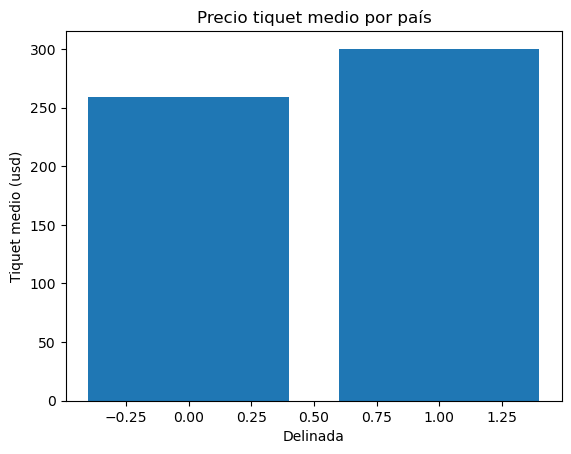

In [85]:
df_media_por_pais = df_transactions_users.groupby("declined")["amount"].mean()
plt.bar(df_media_por_pais.index, df_media_por_pais.values)
plt.title("Precio tiquet medio por país")
plt.ylabel("Tiquet medio (usd)")
plt.xlabel("Delinada")
plt.show()

Podría ampliarse el análisis con:
- filtro por transaccions con éxito (declined=0)
- recuento de usuarios activos por país versus total de usuarios por país (barras apiladas) para estudiar un incentivo donde hay más usuarios registrados pero inactivos o qué países tienen pocos usuarios totales y necesitan más campañas para consolidarse y compensar tener el mercado abierto allí.